Preprocessing File

This file is used to apply all of the pre-processing steps to a set of images. The code is designed to work as follows:

Each pre-processing step operates as its own self-contained block of code. Users will only need to specify the folder path that they could like to apply the code to.

NB: Please ensure that there are only image files in the folders you are trying to process; the code is designed to read over a number of image formats

Code Operation:

1. The code will display the original set of images in the folder for verification purposes 
2. The specific pre-processing step will run over each item in the folder
3. The set of processed images will be displayed for verification
4. The user will have the opportunity to save the produced images as .npy files or pngs

Assigning Directory

In [8]:
# import required module
import os
# assign directory
directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\PP - Preprocessed Images\Contrast Stretching\Original Images'

Displaying Images

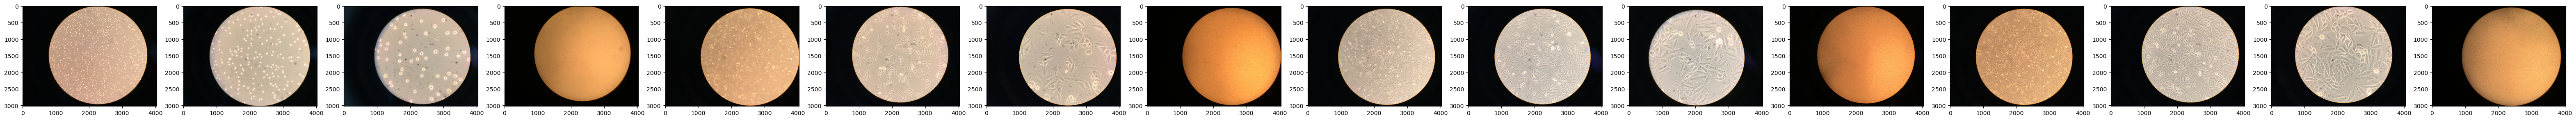

In [9]:
#Importing libraries
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# List to hold all images
images = []

# Show all images in the directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    # Checking if image file is eligible
    if os.path.isfile(f):
        img = mpimg.imread(f)  # Load the image
        images.append(img)  # Append the image to the list

# Display all images side-by-side
num_images = len(images)
fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))  # Adjust figsize as needed

for ax, img in zip(axes, images):
    ax.imshow(img)

plt.show()

Converting images to grayscale

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image  # Import PIL for image resizing

# Directory containing images
input_directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\PP - Preprocessed Images\Gray Scaling\Original Images'
output_directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\PP - Preprocessed Images\Gray Scaling\Processed Images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

def save_as_npy(image, filename):
    """Saves the grayscale image as a .npy file."""
    npy_file = os.path.join(output_directory, f'saved_{os.path.splitext(filename)[0]}.npy')  
    np.save(npy_file, image)  

def resize_image(image, output_resolution):
    """Resize the image to the specified resolution."""
    img_pil = Image.fromarray(image.astype('uint8'))  
    img_resized = img_pil.resize(output_resolution, Image.LANCZOS)  # Use LANCZOS filter
    return np.array(img_resized)  

# Desired output resolution (width, height)
output_resolution = (4032, 3024)  

# Show all images in the input directory
for filename in os.listdir(input_directory):
    f = os.path.join(input_directory, filename)

    if os.path.isfile(f):
        try:
            img = mpimg.imread(f)  # Load the image
            
            # Convert to grayscale
            if img.ndim == 3:
                img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
            else:
                img_gray = img
            
            # Resize the grayscale image
            img_resized = resize_image(img_gray, output_resolution)

            # Save the resized grayscale image
            output_file = os.path.join(output_directory, f'saved_{filename}')
            plt.imsave(output_file, img_resized, cmap='gray')  # Save the resized image directly
            plt.close()

            # Save the grayscale image as a .npy file
            save_as_npy(img_resized, filename)
            print(f"Processed and saved: {filename}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

print("Grayscale images and .npy files have been saved successfully.")




Processed and saved: D0 - T25 - 10x.JPG
Processed and saved: D0 - T25 - 20x.JPG
Processed and saved: D0 - T25 - 40x.JPG
Processed and saved: D0 - T25 - 4x.JPG
Processed and saved: D1 - T25 - 10x.JPG
Processed and saved: D1 - T25 - 20x.JPG
Processed and saved: D1 - T25 - 40x.JPG
Processed and saved: D1 - T25 - 4x.JPG
Processed and saved: D2 - T25 - 10x.JPG
Processed and saved: D2 - T25 - 20x.JPG
Processed and saved: D2 - T25 - 40x.JPG
Processed and saved: D2 - T25 - 4x.JPG
Processed and saved: D3 - T25 - 10x.JPG
Processed and saved: D3 - T25 - 20x.JPG
Processed and saved: D3 - T25 - 40x.JPG
Processed and saved: D3 - T25 - 4x.JPG
Grayscale images and .npy files have been saved successfully.


Applying Gaussian Filtering to Images to be used

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy.ndimage import gaussian_filter  # Import Gaussian filter

# Directory containing images
input_directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\PP - Preprocessed Images\Gray Scaling\Original Images'
output_directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\PP - Preprocessed Images\Gaussian Filter\Processed Images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

def save_as_npy(image, filename):
    """Saves the image as a .npy file."""
    npy_file = os.path.join(output_directory, f'saved_{os.path.splitext(filename)[0]}.npy')
    np.save(npy_file, image)

def resize_image(image, output_resolution):
    """Resize the image to the specified resolution."""
    img_pil = Image.fromarray(image.astype('uint8'))
    img_resized = img_pil.resize(output_resolution, Image.LANCZOS)
    return np.array(img_resized)

# Desired output resolution (width, height)
output_resolution = (4032, 3024)

# Show all images in the input directory
for filename in os.listdir(input_directory):
    f = os.path.join(input_directory, filename)

    if os.path.isfile(f):
        try:
            img = mpimg.imread(f)  # Load the image
            print(f"Loaded image {filename} with shape: {img.shape} and max value: {np.max(img)}")

            if img.dtype == np.float32 or img.dtype == np.float64:
                img = (img * 255).astype(np.uint8)

            img_filtered = gaussian_filter(img, sigma=1)  # Adjust sigma as needed
            print(f"Filtered image max value: {np.max(img_filtered)}")

            img_resized = resize_image(img_filtered, output_resolution)
            print(f"Resized image shape: {img_resized.shape}")

            output_file = os.path.join(output_directory, f'saved_{filename}')
            plt.imsave(output_file, img_resized, cmap='gray')  # Use cmap for grayscale images
            plt.close()

            # Save the filtered image as a .npy file
            save_as_npy(img_resized, filename)
            print(f"Processed and saved: {filename}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

print("Filtered images and .npy files have been saved successfully.")


Loaded image D0 - T25 - 10x.JPG with shape: (3024, 4032, 3) and max value: 255
Filtered image max value: 254
Resized image shape: (3024, 4032, 3)
Processed and saved: D0 - T25 - 10x.JPG
Loaded image D0 - T25 - 20x.JPG with shape: (3024, 4032, 3) and max value: 255
Filtered image max value: 254
Resized image shape: (3024, 4032, 3)
Processed and saved: D0 - T25 - 20x.JPG
Loaded image D0 - T25 - 40x.JPG with shape: (3024, 4032, 3) and max value: 255
Filtered image max value: 254
Resized image shape: (3024, 4032, 3)
Processed and saved: D0 - T25 - 40x.JPG
Loaded image D0 - T25 - 4x.JPG with shape: (3024, 4032, 3) and max value: 255
Filtered image max value: 242
Resized image shape: (3024, 4032, 3)
Processed and saved: D0 - T25 - 4x.JPG
Loaded image D1 - T25 - 10x.JPG with shape: (3024, 4032, 3) and max value: 255
Filtered image max value: 253
Resized image shape: (3024, 4032, 3)
Processed and saved: D1 - T25 - 10x.JPG
Loaded image D1 - T25 - 20x.JPG with shape: (3024, 4032, 3) and max valu

Applying contrast stretching

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Directory containing images
input_directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\PP - Preprocessed Images\Gray Scaling\Original Images'
output_directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\PP - Preprocessed Images\Contrast Stretching\Processed Images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

def save_as_npy(image, filename):
    """Saves the image as a .npy file."""
    npy_file = os.path.join(output_directory, f'saved_{os.path.splitext(filename)[0]}.npy')
    np.save(npy_file, image)

def resize_image(image, output_resolution):
    """Resize the image to the specified resolution."""
    img_pil = Image.fromarray(image.astype('uint8'))
    img_resized = img_pil.resize(output_resolution, Image.LANCZOS)
    return np.array(img_resized)

def contrast_stretch(image):
    """Apply contrast stretching to the image."""
    # Flatten the image array and calculate min and max values
    img_min = np.min(image)
    img_max = np.max(image)
    
    # Apply contrast stretching formula
    stretched = (image - img_min) / (img_max - img_min) * 255
    stretched = np.clip(stretched, 0, 255)  # Ensure values are within valid range
    return stretched.astype(np.uint8)

# Desired output resolution (width, height)
output_resolution = (4032, 3024)

# Show all images in the input directory
for filename in os.listdir(input_directory):
    f = os.path.join(input_directory, filename)

    if os.path.isfile(f):
        try:
            img = mpimg.imread(f)  # Load the image

            # Apply contrast stretching
            img_stretched = contrast_stretch(img)
            
            # Resize the contrast-stretched image
            img_resized = resize_image(img_stretched, output_resolution)

            # Save the resized contrast-stretched image
            output_file = os.path.join(output_directory, f'saved_{filename}')
            plt.imsave(output_file, img_resized)
            plt.close()

            # Save the contrast-stretched image as a .npy file
            save_as_npy(img_resized, filename)
            print(f"Processed and saved: {filename}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

print("Contrast-stretched images and .npy files have been saved successfully.")


Processed and saved: D0 - T25 - 10x.JPG
Processed and saved: D0 - T25 - 20x.JPG
Processed and saved: D0 - T25 - 40x.JPG
Processed and saved: D0 - T25 - 4x.JPG
Processed and saved: D1 - T25 - 10x.JPG
Processed and saved: D1 - T25 - 20x.JPG
Processed and saved: D1 - T25 - 40x.JPG
Processed and saved: D1 - T25 - 4x.JPG
Processed and saved: D2 - T25 - 10x.JPG
Processed and saved: D2 - T25 - 20x.JPG
Processed and saved: D2 - T25 - 40x.JPG
Processed and saved: D2 - T25 - 4x.JPG
Processed and saved: D3 - T25 - 10x.JPG
Processed and saved: D3 - T25 - 20x.JPG
Processed and saved: D3 - T25 - 40x.JPG
Processed and saved: D3 - T25 - 4x.JPG
Contrast-stretched images and .npy files have been saved successfully.
